# Hypothesis Testing

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
df = pd.read_csv('Sachin_ODI.csv')

In [3]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [5]:
mu = df['runs'].mean()
mu # population mean

43.24166666666667

In [7]:
sigma = df['runs'].std()
sigma # population sigma

42.18245206052442

Is Sachin's scoring pattern in 1st and 2nd innings different?

In [9]:
df.groupby(['Inns'])['runs'].mean() # Not confident about the difference between the mean runs of two innings.

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

1st innings score seems more as the mean is more. 

Is this chance or is this significant?
This is where hypothesis testing comes into picture.

In [10]:
df.groupby(['Won'])['runs'].mean() # We're confident about this difference.

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [11]:
df.groupby(['century'])['runs'].mean() # This is fairly obvious.

century
False     31.130573
True     125.913043
Name: runs, dtype: float64

In [12]:
mu

43.24166666666667

Ha: won't be != as what we actually wanna check is if first innings average is greater than 43.2

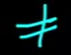

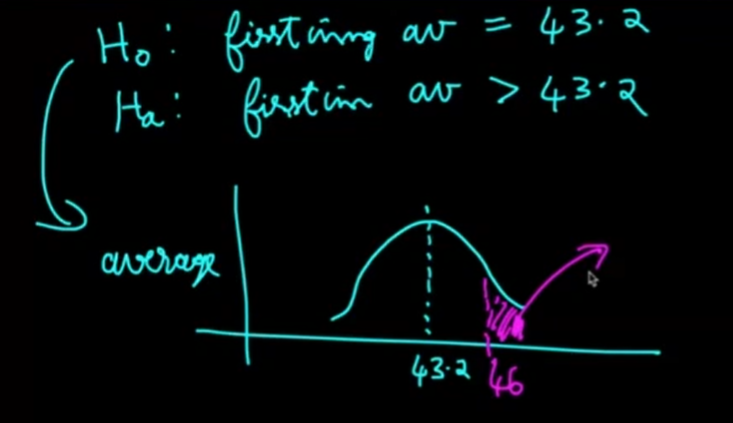

In [16]:
mu  

43.24166666666667

In [17]:
first_innings_runs = df[df['Inns'] == 1][['runs']]

In [18]:
len(first_innings_runs) # 170 matches

170

In [19]:
data = first_innings_runs

In [20]:
data.mean() # observed test statistic

runs    46.670588
dtype: float64

This is a right-tailed test.

In [23]:
z_stat = (data.mean() - mu) / (sigma/np.sqrt(len(data))) # here, we'll call it z statistic instead of z-value.
z_stat

runs    1.059864
dtype: float64

In [24]:
p_value = 1 - norm.cdf(z_stat)
p_value

array([0.14460321])

In [25]:
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Stick to the null hypothesis")

Stick to the null hypothesis


Scoring pattern for matches Won:

H0: average runs in matches won = 43.2 (typical average)

Ha: average runs in matches won > 43.2

In [27]:
victory_runs = df[df['Won'] == True][['runs']]
data = victory_runs

In [33]:
data.mean()

runs    51.0
dtype: float64

In [34]:
len(data)

184

In [30]:
z_stat = (data.mean() - mu) / (sigma / np.sqrt(len(data)))
z_stat

runs    2.494856
dtype: float64

In [32]:
p_value = 1 - norm.cdf(z_stat)
p_value

array([0.00630041])

In [36]:
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Stick to the null hypothesis")

Reject Null Hypothesis


Conclusion: 

We converted our instinct into a quantifiable metric.

Sachin Tendulkar's scoring pattern in 1st innings(the change that we saw) is not statistically significant. 

But, scoring pattern in the matches won is statistically significant.

### Scoring pattern for Matches lost:

For matches lost, the sample mean is less than the population mean. Left-tailed test will be done. p-value will be norm.cdf(z-stat)

H0: average runs in matches lost = 43.2 (typical average)

Ha: average runs in matches lost < 43.2

In [37]:
defeat_runs = df[df['Won'] == False]['runs']

In [38]:
data = defeat_runs
len(data)

176

In [39]:
data.mean()

35.13068181818182

In [42]:
z_stat = (data.mean() - mu) / (sigma / np.sqrt(len(data)))
z_stat

-2.5509274220553637

In [43]:
p_value = norm.cdf(z_stat)
p_value

0.005371834819904417

Since p_value is less than 0.05 in this case, we can reject the null hypothesis.

In [44]:
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Stick to the null hypothesis")

Reject Null Hypothesis


As you can see, the norm.cdf(z) returns the probability of observing a test statistic as extreme or more extreme (less) 
than the one calculated, assuming the null hypothesis is true.

It's worth noting that you can also use the norm.ppf(p) function to find the z-score given a p-value.


If you have any questions, connect with me here: https://www.linkedin.com/in/khushalkumar/